In [1]:
#Beschreibung: Bolling Bänder und RSI für AMZN

In [2]:
#Import der Libraries

import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start = "2018-01-01"
end = "2020-01-01"

In [4]:
df = web.DataReader("AMZN", data_source="yahoo",
                   start = start, end=end)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049


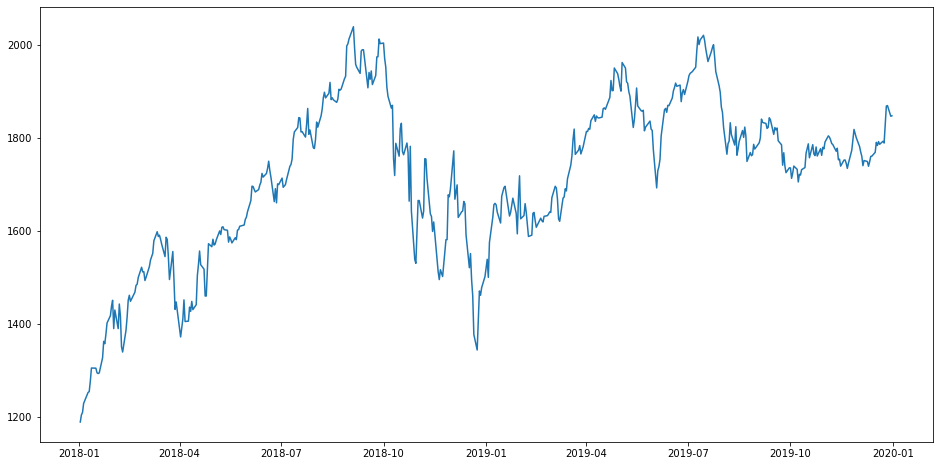

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df["Adj Close"]);

In [8]:
#Bolling Bänder

#20 Tage Moving average
df["20 Tage MA"] = df["Adj Close"].rolling(window=20).mean()

#obere Band = 20MA + 2*std(20)
df["Upper"] = df["20 Tage MA"] + 2*df["Adj Close"].rolling(window=20).std()

#untere Band = 20MA - 2*std(20)
df["Lower"] = df["20 Tage MA"] - 2*df["Adj Close"].rolling(window=20).std()

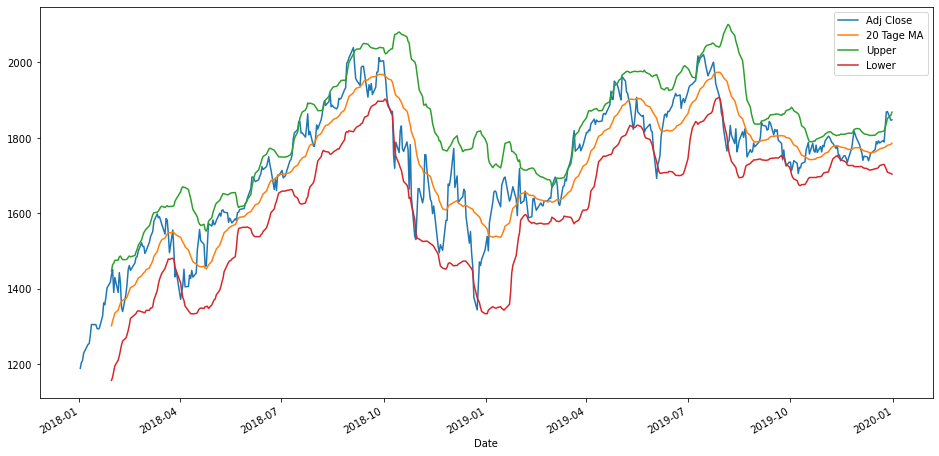

In [9]:
df[["Adj Close", "20 Tage MA", "Upper", "Lower"]].plot(figsize=(16,8));

In [10]:
#Relativer Stärke Index

returns = df["Adj Close"].pct_change()
returns.dropna(inplace = True)

In [11]:
#positive gains(up) und negative gains(down)

up = returns.copy()
down = returns.copy()

up[up<0] = 0
down[down>0] = 0

In [12]:
period = 14

AVG_gain = up.rolling(window=period).mean()
AVG_loss = abs(down.rolling(window=period).mean())

In [13]:
#Berechnung der RSI

RS = AVG_gain / AVG_loss
RSI = 100 - (100/(1+RS))

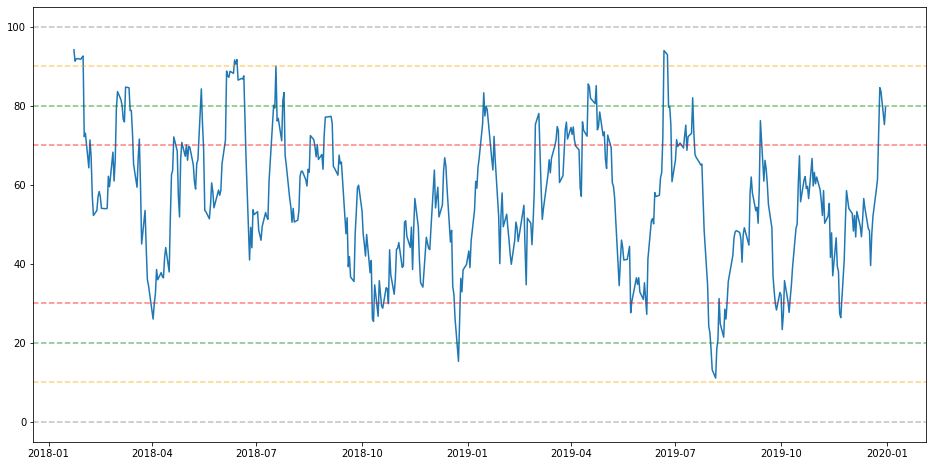

In [17]:
plt.figure(figsize=(16,8))
plt.plot(RSI)
plt.axhline(0, linestyle = "--", alpha = 0.5, color = "gray")
plt.axhline(10, linestyle = "--", alpha = 0.5, color = "orange")
plt.axhline(20, linestyle = "--", alpha = 0.5, color = "green")
plt.axhline(30, linestyle = "--", alpha = 0.5, color = "red")
plt.axhline(70, linestyle = "--", alpha = 0.5, color = "red")
plt.axhline(80, linestyle = "--", alpha = 0.5, color = "green")
plt.axhline(90, linestyle = "--", alpha = 0.5, color = "orange")
plt.axhline(100, linestyle = "--", alpha = 0.5, color = "gray");